<a href="https://colab.research.google.com/github/icarob-eng/data-science-airlines/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise no ano


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Caminho para a pasta onde estão os arquivos
data_dir = 'archive'

# Dicionário para armazenar os DataFrames
dados_voos = {}

csv_path = os.path.join(data_dir, 'reduced2019.csv');
if os.path.exists(csv_path):
  print("Lendo CSV para o ano 2019 reduzido")
  dados_voos[2019] = pd.read_csv(csv_path)
else:
  print("Arquivo não encontrado!")

# Exemplo de visualização
dados_voos[2019].head()
# print(airlines_df.head())


Lendo CSV para o ano 2019 reduzido


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,DepTime,DepDelayMinutes,DepDelay,ArrTime,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2019-04-01,Envoy Air,LIT,ORD,False,False,1209.0,0.0,-3.0,1350.0,...,10.0,1219.0,1342.0,8.0,-15.0,0.0,-1.0,1400-1459,3,0
1,2019-04-02,Envoy Air,LIT,ORD,False,False,1200.0,0.0,-12.0,1348.0,...,10.0,1210.0,1339.0,9.0,-17.0,0.0,-2.0,1400-1459,3,0
2,2019-04-03,Envoy Air,LIT,ORD,False,False,1203.0,0.0,-9.0,1342.0,...,11.0,1214.0,1336.0,6.0,-23.0,0.0,-2.0,1400-1459,3,0
3,2019-04-04,Envoy Air,LIT,ORD,False,False,1435.0,143.0,143.0,1621.0,...,17.0,1452.0,1615.0,6.0,136.0,1.0,9.0,1400-1459,3,0
4,2019-04-05,Envoy Air,LIT,ORD,False,False,1216.0,4.0,4.0,1410.0,...,18.0,1234.0,1357.0,13.0,5.0,0.0,0.0,1400-1459,3,0


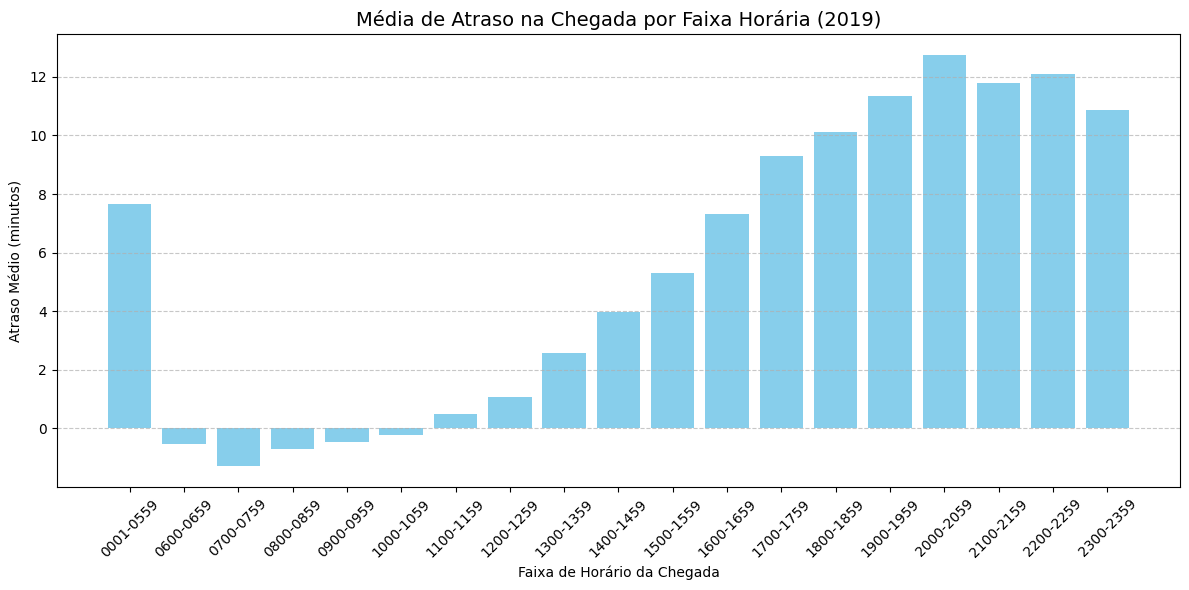

In [2]:
### Relação entre os atrasos médios e o horário do atraso de voos no ano de 2019 ###

# Filtra o dataframe de 2019
df_ano = dados_voos[2019]

# Agrupa os dados e calcula a média de atraso na chegada por faixa horária
media_atraso_por_hora = (
    df_ano.groupby('ArrTimeBlk')['ArrDelay']
    .mean()
    .reset_index()
    .sort_values('ArrTimeBlk')
)

x = media_atraso_por_hora['ArrTimeBlk']
y = media_atraso_por_hora['ArrDelay']

plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')

plt.title('Média de Atraso na Chegada por Faixa Horária (2019)', fontsize=14)
plt.xlabel('Faixa de Horário da Chegada')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gcf().savefig('media_atraso_horario_2019.png', dpi=300, bbox_inches='tight')
plt.show()


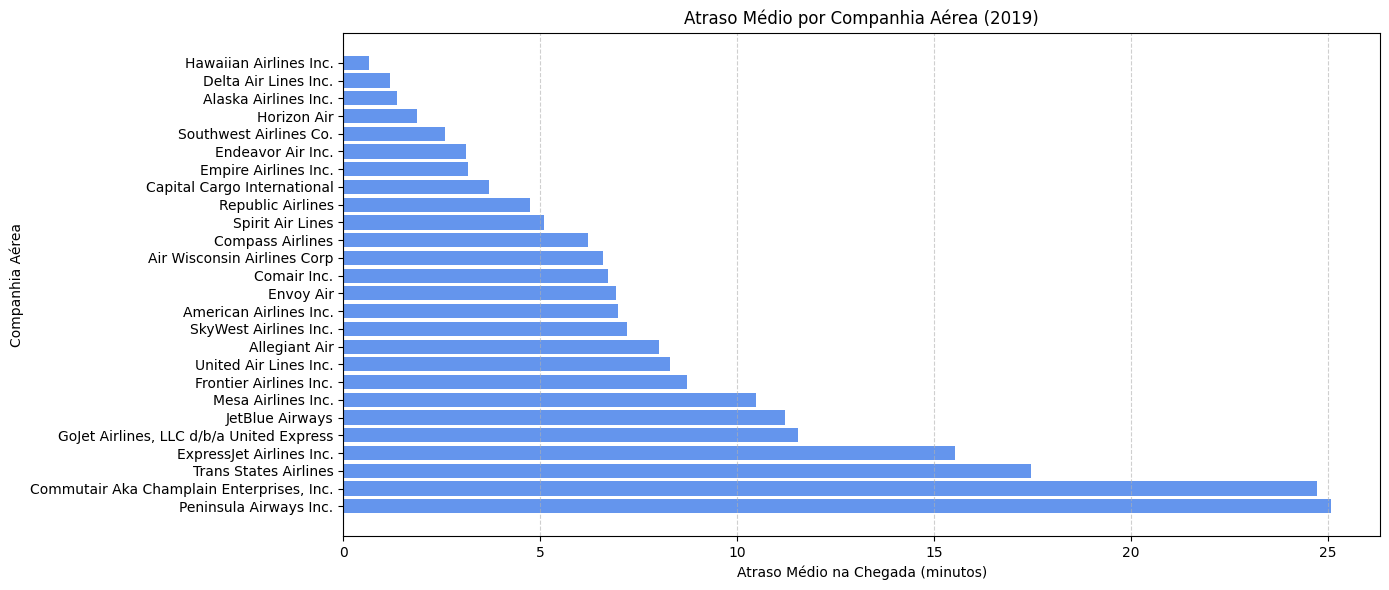

In [3]:
# Atraso por companhia aérea

# Agrupa por companhia aérea e calcula a média de atraso na chegada
media_atraso_por_companhia = (
    df_ano.groupby('Airline')['ArrDelay']
    .mean()
    .reset_index()
    .sort_values('ArrDelay', ascending=False)
)

x = media_atraso_por_companhia['Airline']
y = media_atraso_por_companhia['ArrDelay']

plt.figure(figsize=(14, 6))
plt.barh(x, y, color='cornflowerblue')
plt.xlabel('Atraso Médio na Chegada (minutos)')
plt.ylabel('Companhia Aérea')
plt.title('Atraso Médio por Companhia Aérea (2019)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gcf().savefig('atraso_por_companhia_2019.png', dpi=300, bbox_inches='tight')
plt.show()


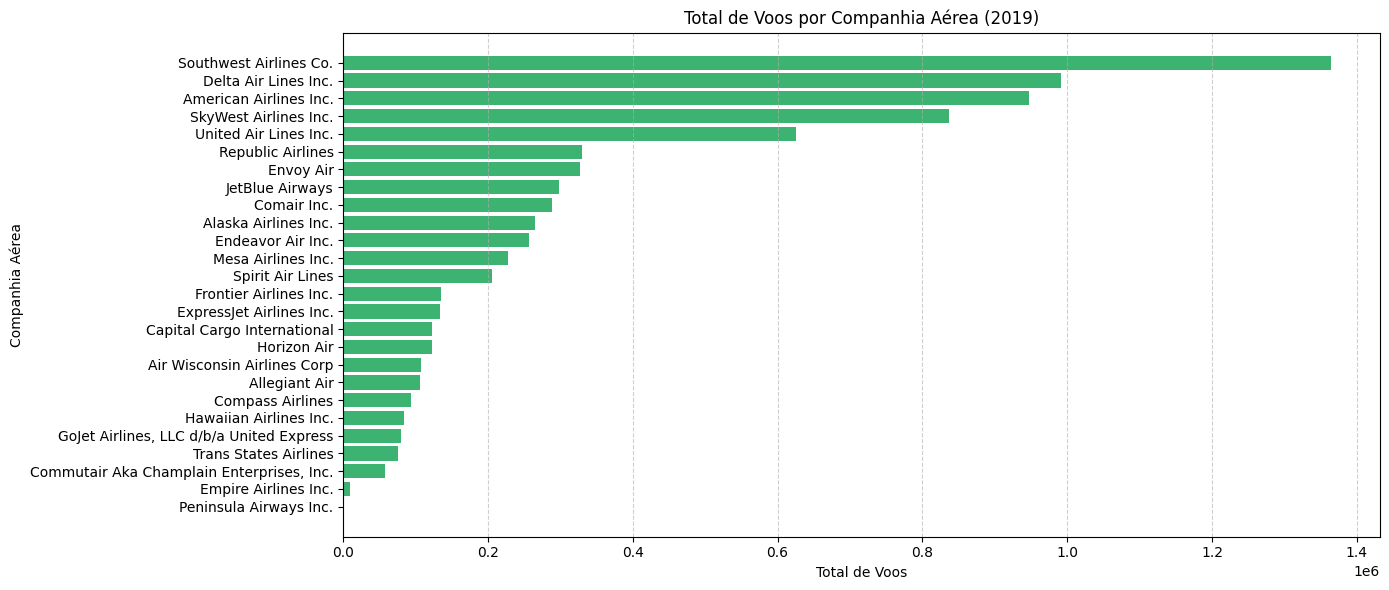

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Garantir que os nomes das colunas estejam limpos
df_ano.columns = df_ano.columns.str.strip()

voos_por_companhia_series = df_ano['Airline'].value_counts()
voos_por_companhia = voos_por_companhia_series.reset_index()

voos_por_companhia = voos_por_companhia.rename(columns={'count': 'TotalVoos'})


x = voos_por_companhia['Airline']
y = voos_por_companhia['TotalVoos']

plt.figure(figsize=(14, 6))
plt.barh(x, y, color='mediumseagreen')
plt.xlabel('Total de Voos')
plt.ylabel('Companhia Aérea')
plt.title('Total de Voos por Companhia Aérea (2019)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gcf().savefig('total_voo_companhia_2019.png', dpi=300, bbox_inches='tight')
plt.show()


Total de companhias aéreas únicas: 26


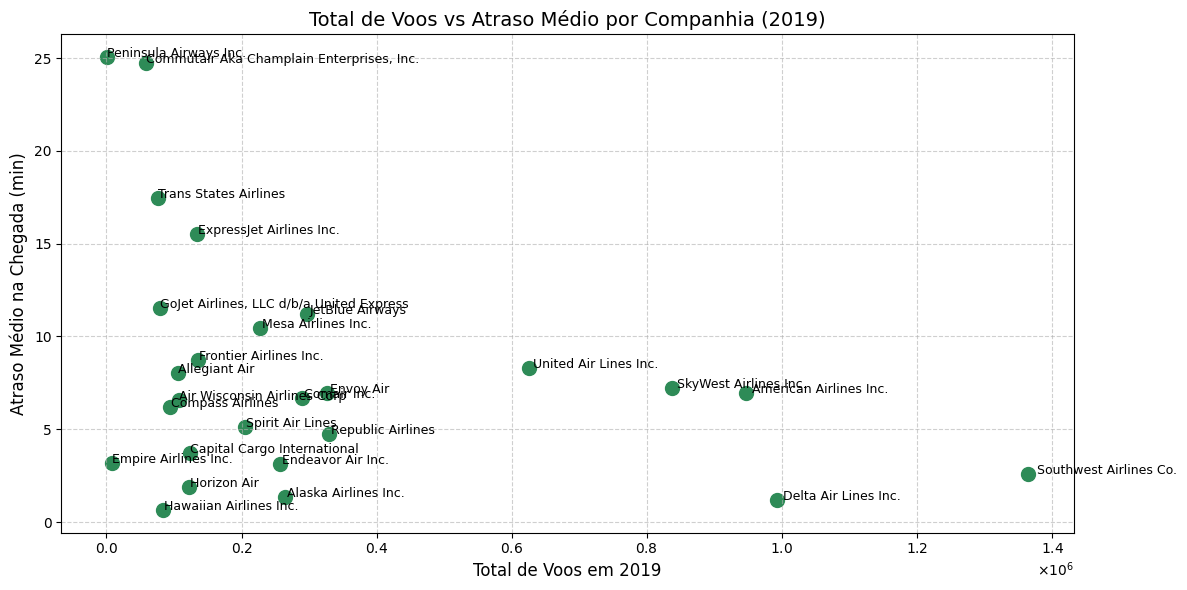

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

# Agrupar por companhia aérea
agrupado = df_ano.groupby('Airline').agg({
    'ArrDelay': 'mean',
    'FlightDate': 'count'  # número de voos (poderia usar qualquer coluna não nula)
}).reset_index()

num_companhias = df_ano['Airline'].nunique()
print(f"Total de companhias aéreas únicas: {num_companhias}")

agrupado = agrupado.rename(columns={
    'ArrDelay': 'AtrasoMedio',
    'FlightDate': 'TotalVoos'
})

plt.figure(figsize=(12, 6))
plt.scatter(agrupado['TotalVoos'], agrupado['AtrasoMedio'], color='seagreen', s=100)

for i in range(len(agrupado)):
    plt.text(agrupado['TotalVoos'][i]*1.01, agrupado['AtrasoMedio'][i],
             agrupado['Airline'][i], fontsize=9)

# Aplicar notação científica no eixo x
plt.gca().xaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.xlabel('Total de Voos em 2019', fontsize=12)
plt.ylabel('Atraso Médio na Chegada (min)', fontsize=12)
plt.title('Total de Voos vs Atraso Médio por Companhia (2019)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gcf().savefig('Voos_Atraso_medio_Companhias_2019.png', dpi=300, bbox_inches='tight')
plt.show()



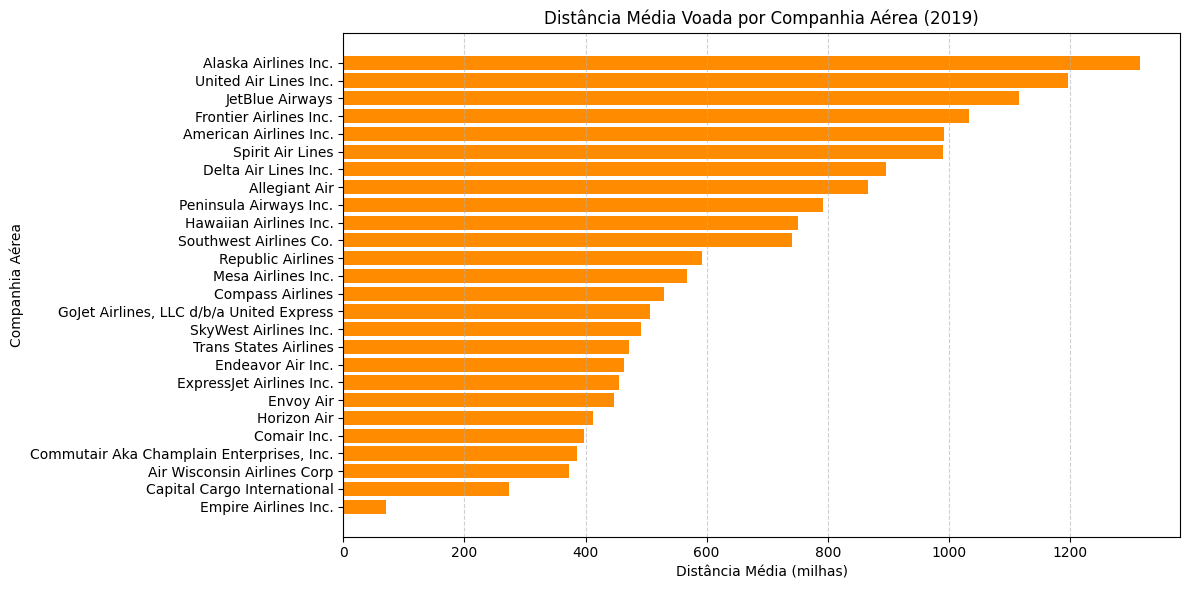

In [6]:
# Relação entre distâncias média percorridas por companhias aéreas

# Agrupar por companhia e calcular distância média
distancia_media = df_ano.groupby('Airline')['Distance'].mean().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(12, 6))
plt.barh(distancia_media.index, distancia_media.values, color='darkorange')
plt.xlabel('Distância Média (milhas)')
plt.ylabel('Companhia Aérea')
plt.title('Distância Média Voada por Companhia Aérea (2019)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gcf().savefig('Distancia_Companhias_2019.png', dpi=300, bbox_inches='tight')
plt.show()


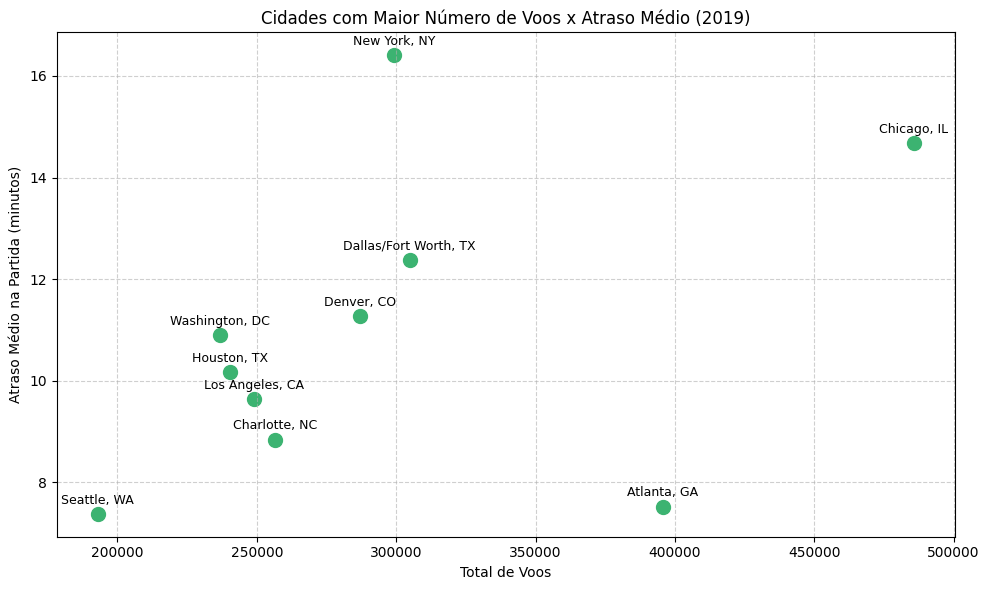

In [7]:
# Comparação das cidades com maior número de voos e com o atraso médio (saída) dessa cidade

# Agrupar por cidade de origem
agrupado_origem = df_ano.groupby('DestCityName').agg({
    'DepDelay': 'mean',
    'FlightDate': 'count'
}).rename(columns={
    'DepDelay': 'AtrasoMedio',
    'FlightDate': 'TotalVoos'
}).reset_index()

# Selecionar top 10 cidades com mais voos
top_cidades = agrupado_origem.sort_values(by='TotalVoos', ascending=False).head(10)

# Scatter: Total de voos vs. Atraso médio
plt.figure(figsize=(10, 6))
plt.scatter(top_cidades['TotalVoos'], top_cidades['AtrasoMedio'], color='mediumseagreen', s=100)

# Adicionar rótulos nos pontos (nomes das cidades)
for i, row in top_cidades.iterrows():
    plt.text(row['TotalVoos'], row['AtrasoMedio'] + 0.2, row['DestCityName'], fontsize=9, ha='center')

# Configurações do gráfico
plt.xlabel('Total de Voos')
plt.ylabel('Atraso Médio na Partida (minutos)')
plt.title('Cidades com Maior Número de Voos x Atraso Médio (2019)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('top10_cidades_atraso_2019.png', dpi=300, bbox_inches='tight')
plt.show()


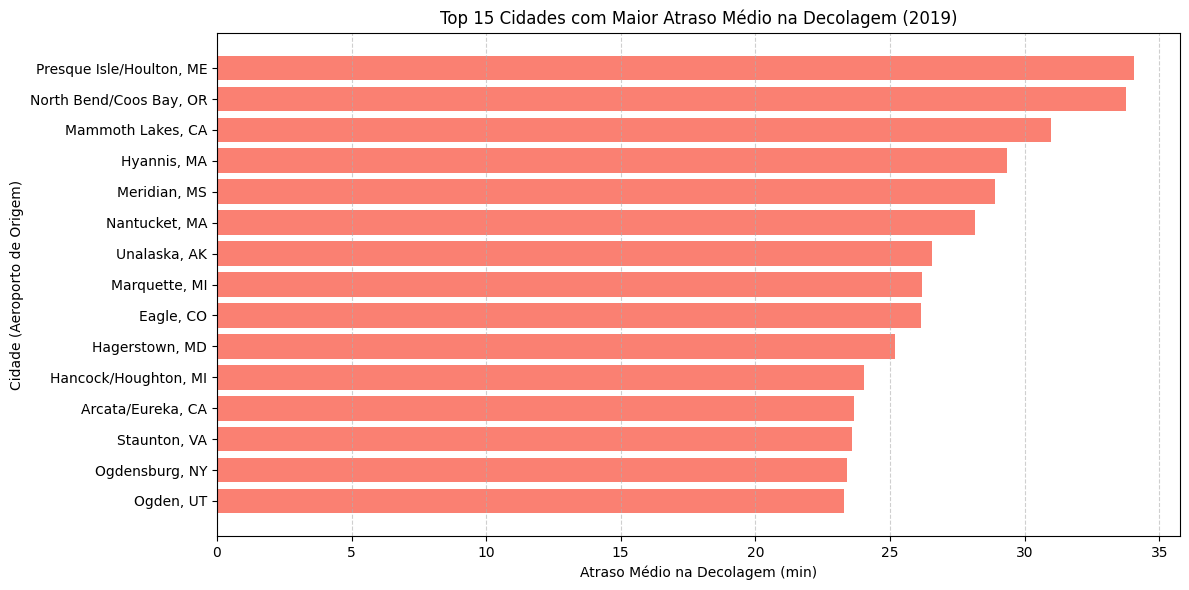

In [8]:
# Análise dos atrasos médios (saída) de acordo com as cidades

# Agrupar por cidade (aeroporto de origem) e calcular o atraso médio
atraso_por_cidade = df_ano.groupby('OriginCityName')['DepDelay'].mean().sort_values(ascending=False).head(15)

# Gráfico de barras horizontais
plt.figure(figsize=(12, 6))
plt.barh(atraso_por_cidade.index, atraso_por_cidade.values, color='salmon')
plt.xlabel('Atraso Médio na Decolagem (min)')
plt.ylabel('Cidade (Aeroporto de Origem)')
plt.title('Top 15 Cidades com Maior Atraso Médio na Decolagem (2019)')
plt.gca().invert_yaxis()  # Coloca a maior barra no topo
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gcf().savefig('Atraso_decolagem_2019.png', dpi=300, bbox_inches='tight')
plt.show()


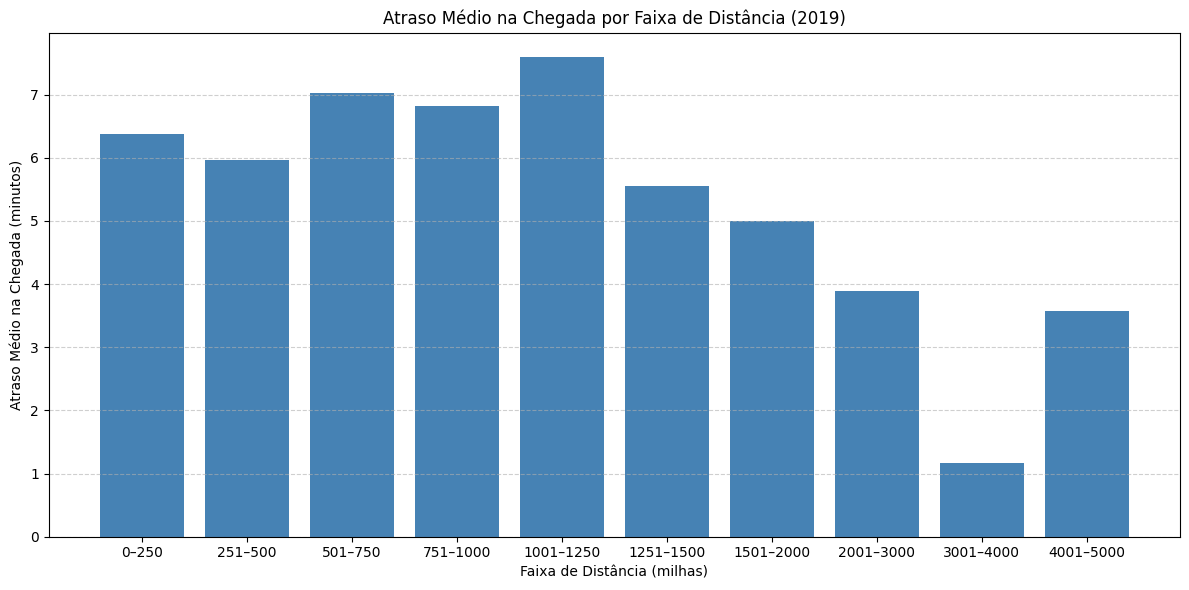

In [ ]:
# Análise da relação entre o atraso na chegada (ArrDelay) e intervalos de distância do voo (Distance).

# Filtrar voos válidos
df_filtrado = df_ano[
    (df_ano['Cancelled'] == False) &
    df_ano['ArrDelay'].notna() &
    df_ano['Distance'].notna()
]

# Criar faixas de distância
bins = [0, 250, 500, 750, 1000, 1250, 1500, 2000, 3000, 4000, 5000]
labels = ['0–250', '251–500', '501–750', '751–1000', '1001–1250', '1251–1500',
          '1501–2000', '2001–3000', '3001–4000', '4001–5000']

df_filtrado = df_filtrado.copy()
df_filtrado['FaixaDistancia'] = pd.cut(df_filtrado['Distance'], bins=bins, labels=labels)

atraso_por_faixa = df_filtrado.groupby('FaixaDistancia', observed=False)['ArrDelay'].mean().reset_index()

# Gráfico
plt.figure(figsize=(12, 6))
plt.bar(atraso_por_faixa['FaixaDistancia'], atraso_por_faixa['ArrDelay'], color='steelblue')

plt.xlabel('Faixa de Distância (milhas)')
plt.ylabel('Atraso Médio na Chegada (minutos)')
plt.title('Atraso Médio na Chegada por Faixa de Distância (2019)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gcf().savefig('Atraso_medio_chegada_distancia_2019.png', dpi=300, bbox_inches='tight')
plt.show()
